# Clingraph quick start with Jupyter

We present in this notebook the basic functionalities of clingraph. First we show the python package functionality, followed by some examples of the command line features.

- Try it yourself! Launch this notebook in Binder :point_right: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/potassco/clingraph/master?labpath=notebook.ipynb)

- We suggest that the user first gets familiarized with the accepted :speech_balloon: [syntax](https://clingraph.readthedocs.io/en/latest/clingraph/syntax.html).

- For the details on the package options please go to the :books: [api documentation](https://clingraph.readthedocs.io/en/latest/clingraph/api.html#clingraph).

For advanced details on how to use the command line see our [command line documentation](https://clingraph.readthedocs.io/en/latest/clingraph/console.html#). And our [examples folder](https://github.com/potassco/clingraph/tree/master/examples) showing the range of functionalities in different applications (*Each subfolder contains a README that explains how to run it*). 

## Basic usage

In [1]:
from clingraph import Clingraph

### Create a clingraph from string

Loads a string of facts and computes the [graphviz objects](https://graphviz.readthedocs.io/en/stable/) by calling `compute_graphs()`.

In [2]:
g = Clingraph()
g.add_fact_string('''
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"Andres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").''')
g.compute_graphs()

##### Show the cligraph object

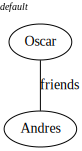

In [3]:
g

##### Print a clingraph source code

This source code uses the [DOT Language](https://graphviz.org/doc/info/lang.html)

In [4]:
print(g.source())

//----------default----------
graph default {
	andres [label=Andres]
	oscar [label=Oscar]
	oscar -- andres [label=friends]
}



##### Get the graphviz object

Obtains the graphviz object for the default graph

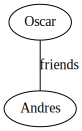

In [5]:
g.get_graphviz()

### Create a clingraph from file

The file contents representing two different graphs.

In [6]:
!cat examples/basic/example2/example_2.lp

    graph(toms_family).
    graph(bills_family).

    node(tom, toms_family).
    node(max, toms_family).
    edge((tom, max), toms_family).

    node(bill, bills_family).
    node(jen, bills_family).
    edge((bill, jen), bills_family).


##### Load the facts in the file

In [7]:
g = Clingraph()
g.add_fact_file("examples/basic/example2/example_2.lp")

##### Add additional facts from a string and compute the graphs

In [8]:
g.add_fact_string("attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).")
g.compute_graphs()

##### Show the clingraph which contains two different graphs

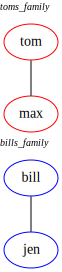

In [9]:
g

##### Get the graphviz object for a specific graph

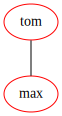

In [10]:
g.get_graphviz('toms_family')

##### Show source of one graph

In [11]:
print(g.get_graphviz('toms_family').source)

graph toms_family {
	node [color=red]
	tom
	max
	tom -- max
}



##### Save all graphs 

In [12]:
g.save(directory="out",format="pdf")

## Clingo integration

We show how to integrate clingraph with the [clingo API](https://www.cs.uni-potsdam.de/~kaminski/pyclingo-cffi/clingo/index.html).

For this we use a `MultiModelClingraph` that can handle one Clingraph for each stable model.

### Create a clingraph from each model retuned in the clingos solve

This is achived my passing the `g.add_model` method in the `on_model` callback argument for `solve`.

In this case our program has two stable models. One with `node(a)` and the other one with `node(b)`

In [13]:
from clingraph import MultiModelClingraph
from clingo import Control
ctl = Control(["-n2"])
g = MultiModelClingraph()
ctl.add("base", [], "1{node(a);node(b)}1.")
ctl.ground([("base", [])])
ctl.solve(on_model=g.add_model)
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

// Graph hasn't been computed yet

//=========================
//	Model: 2 Costs: [] 
//=========================

// Graph hasn't been computed yet



In [14]:
g.compute_graphs()

In [15]:
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

//----------default----------
graph default {
	a
}

//=========================
//	Model: 2 Costs: [] 
//=========================

//----------default----------
graph default {
	b
}



##### Print the clingraphs obtained for each model

In [16]:
g.clingraphs

{1: {'clingraph': <clingraph.clingraph.Clingraph at 0x10d64a5f0>,
  'name': 'model-0001',
  'costs': []},
 2: {'clingraph': <clingraph.clingraph.Clingraph at 0x10d6614e0>,
  'name': 'model-0002',
  'costs': []}}

##### Obtain the clingraph for the first model

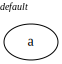

In [17]:
g.get_clingraph(1)

##### Obtain the clingraph for the second model

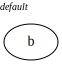

In [18]:
g.get_clingraph(2)

##### Show the source code of the first model

In [19]:
print(g.get_clingraph(1).source())

//----------default----------
graph default {
	a
}



## Command line

Clingraph can be called from the command line with `clingraph`. 

##### Show example contents

In [20]:
!cat examples/basic/example3/example_3.lp

graph(house).
graph(bathroom, house).
graph(bedroom, house).

node(toilet,bathroom).
node(bed,bedroom).
node(desk,bedroom).

edge((toilet,bed),house).


attr(graph, house, label, "Tom's House").
attr(graph, bathroom, style, dotted).
attr(graph, bathroom, label, "Bathroom").
attr(graph, bedroom, style, dotted).
attr(graph, bedroom, label, "Bedroom").

attr(graph_nodes, house, style, filled).
attr(graph_nodes, house, color, cyan).

attr(node, toilet, shape, circle).
attr(node, bed, shape, square).
attr(node, desk, shape, square).

attr(edge, (toilet,bed), color, red).


##### Run clingraph to compute the graphs and output the source

When using an isntallation from source we use `python -m clingraph` instead of `clingraph`.

In [21]:
!python -m clingraph examples/basic/example3/example_3.lp --render --format=png

//----------house----------
graph house {
	graph [label="Tom's House"]
	node [color=cyan style=filled]
	toilet -- bed [color=red]
	subgraph cluster_bedroom {
		graph [label=Bedroom style=dotted]
		bed [shape=square]
		desk [shape=square]
	}
	subgraph cluster_bathroom {
		graph [label=Bathroom style=dotted]
		toilet [shape=circle]
	}
}



#### Show the contents of the saved file `out/house.png`

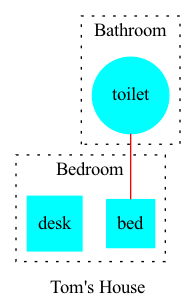

In [22]:
from IPython.display import Image
Image("out/house.png")

### Clingo integration via command line

We consider that clingo is already install in the system. Otherwise run the following cell to install clingo.

##### Show the example using clingo code

In [23]:
!cat examples/basic/example5/example_5.lp

1{node(a);node(b)}1.

attr(node,a,color,blue):-node(a).
attr(node,b,color,red):-node(b).


##### Run clingo and pipe the output to clingraph

Any logic program containing rules needs to be solved beforehand, then the facts are passed to clingraph. The special integration for clingo takes as input the json output from clingo obtained with option `--outf=2`.

In [24]:
!clingo examples/basic/example5/example_5.lp -n 0 --outf=2 | python -m clingraph --json --select-model=1 --render --format=png

//----------default----------
graph default {
	a [color=blue]
}



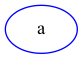

In [25]:
from IPython.display import Image
Image("out/default.png")